<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/Mining_frequent_subgraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv', usecols=['login', 'name'])
df

,login,name
0,vim-sroberge,vimaec/g3d
1,vim-sroberge,vimaec/g3d
2,vim-sroberge,vimaec/g3d
3,vim-sroberge,vimaec/g3d
4,mavimaec,vimaec/g3d
...,...,...
1328,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1329,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1330,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1331,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples


In [3]:
df['login'] = df['login'].apply(lambda x: 'User: '+x)
df['name'] = df['name'].apply(lambda x: 'Repo: '+x)

In [4]:
# Build the adjacency matrix
am = pd.crosstab(df['login'], df['name']).astype(float)
idx = am.columns.union(am.index)
am = am.reindex(index = idx, columns=idx, fill_value=0.0)

Graph with 262 nodes and 192 edges


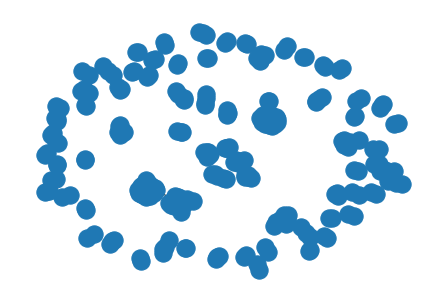

In [5]:
G = nx.from_numpy_matrix(am.to_numpy())
plt.figure(1)
nx.draw(G)
print(nx.info(G))

Graph with 262 nodes and 664 edges


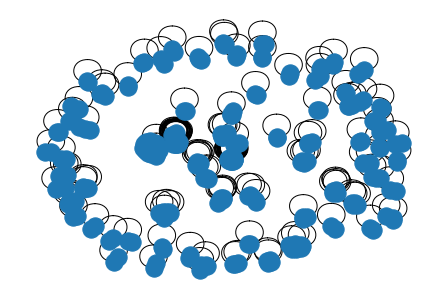

In [6]:
matrix_elements = np.sort(df['login'].unique(), axis=0)
repo_len = len(df['name'].unique())

def  cosine_similarity(vector_a, vector_b):
    
    norma = (np.linalg.norm(vector_a)*np.linalg.norm(vector_b))

    if norma > 0:

        cos_sim = np.dot(vector_a,vector_b)/ norma

    else:

        cos_sim = 0

    return cos_sim

#Initialise an auxiliar matrix to record the user - user similarities
shape = (len(matrix_elements), len(matrix_elements))
aux_matrix = pd.DataFrame((np.zeros(shape=shape)), columns=matrix_elements, index=matrix_elements)

for i in matrix_elements:
    for j in matrix_elements:

        # Compare row vectors
        aux_vector_a = am.loc[i].to_numpy()[:repo_len]
        aux_vector_b = am.loc[j].to_numpy()[:repo_len]
        
        score = cosine_similarity(aux_vector_a, aux_vector_b)
        # print(i, j, score)
        aux_matrix.at[i, j] = score

#%%
# Fill adj_matrix with aux_matrix data
for column in aux_matrix.columns:
    for row in aux_matrix.index:

        aux = aux_matrix.at[row, column]
        am.at[row, column] = aux
        # if (aux == am.at[row, column]) ==  False:
        #     print(aux, row, column)

# %%
# Build graph from matrix, after user-user connections
G = nx.from_numpy_matrix(am.to_numpy())
plt.figure(2)
nx.draw(G)
print(nx.info(G))

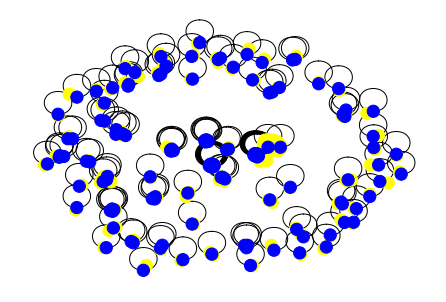

In [7]:
# Initialise the grah
G = nx.MultiGraph()


# Save edges with their weights
edges = []

for row in am.index:
    vector = am.loc[row].to_numpy()
    for i, j in zip(vector, am.columns):
        if i > 0:
            edges.append((row[6:],j[6:],i)) # for nx.Graph() use edges.append((row[6:],j[6:],{'weight': i}))
 
# Save nodes
nodes = []

for name in am.index:
    if name.startswith('User: '):
        nodes.append((name[6:],{"color": "blue"})) #Users are blue
    elif name.startswith('Repo: '):
        nodes.append((name[6:],{"color": "yellow"})) #Repos are yellow

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)    # for nx.Graph() use edges.add_edges_from(edges)
pos = nx.spring_layout(G, seed=52)  # positions for all nodes
# Set nodes colors, blue for users, yellow for repos.
colors = nx.get_node_attributes(G, "color")
node_colors = [colors.get(node) for node in G.nodes()]

# List all users #https://stackoverflow.com/questions/14665767/networkx-specific-nodes-labeling
users = [key for key,value in nx.get_node_attributes(G,'color').items() if value == 'blue']
labels = {}    
for node in G.nodes():
    if node in users:
        labels[node] = node

#%%
fig = plt.figure(3)
nx.draw(G,pos = pos, node_color=node_colors, node_size=150, with_labels=False)
#nx.draw_networkx_labels(G,pos,labels,font_size=12)
plt.show()

In [15]:
nx.number_connected_components(G)

74

In [17]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[42,
 18,
 8,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [16]:
list(nx.connected_components(G))

[{'AkinJimoh', 'AkinJimoh/aj-soner', 'AkinJimoh/sonar-scan'},
 {'CPWRGIT',
  'CPWRGIT/HDDRXM0',
  'CPWRGIT/HDDRXM02',
  'CPWRGIT/HDDRXM0_CWC2',
  'CPWRGIT/ISPWSA0',
  'CPWRGIT/ISPWSA0_CWC2',
  'ralphnuessecpwr',
  'stupot1966'},
 {'Compuware-Corp/TotalTest-Test-Repo', 'efhjnw0'},
 {'APSDevp',
  'DhineshPalanisamy',
  'DhineshPalanisamy/FintechAPP',
  'dhineshaps',
  'dhineshaps/twopull'},
 {'ClaraCastells', 'Dxngaa', 'Dxngaa/print-dxngaa'},
 {'FrankR85', 'FrankR85/cobol-workspace', 'LeonWest95'},
 {'AnthonyGiorgio', 'IBM/IBM-Z-zOS', 'jbouzak'},
 {'IBM/datastage-standalone-workshop', 'stevemar'},
 {'IBM/dbb-pipeline', 'jbyibm'},
 {'IBM/zOS-Client-Web-Enablement-Toolkit',
  'cicsdev/cics-genapp',
  'gorelikg',
  'ian-burnett'},
 {'GitMensch',
  'IonicaBizau',
  'IonicaBizau/node-cobol',
  'IonicaBizau/node.cobol',
  'shamrice',
  'shamrice/COBOL-RSS-Reader',
  'uwol/proleap-cobol-parser'},
 {'Jaikido007/makersbbs-tmct', 'turboKittyNinja'},
 {'KissmeDragon',
  'KissmeDragon/sonar-scanning

In [21]:
connected_components = list(nx.connected_components(G))
connected_components = [c for c in sorted(connected_components, key=len, reverse=True)]

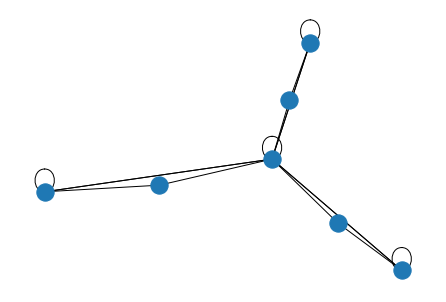

In [31]:
nx.draw(nx.subgraph(G, list(connected_components[4])))

In [8]:
nx.write_edgelist(G, "test_edgelist", delimiter=' ', data=False)

In [9]:
am.shape

(262, 262)

In [10]:
%%capture
!pip install gspan-mining

In [11]:
from gspan_mining.config import parser
from gspan_mining.main import main

In [12]:
args_str = '-s 2 -d True -p True /content/drive/MyDrive/Socialz/otherexample.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

t # 0
v 0 2
v 1 2
e 0 1 2

Support: 2


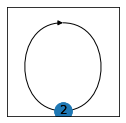


-----------------

t # 1
v 0 2
v 1 2
v 2 2
e 0 1 2
e 0 2 2

Support: 2


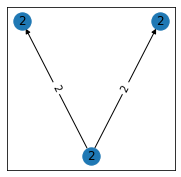


-----------------

Read:	0.21 s
Mine:	0.65 s
Total:	0.86 s


In [13]:
gs = main(FLAGS)